# Homework 3 #

Create the dataset.  <br/>
Separate variables and target - "quality".

In [46]:
import pandas as pd
# Reading the csv file
df = pd.read_csv('winequality-red.csv')
# Separating the variables from the target
variables = df.drop("quality", axis= 1)
target = df['quality']

Do a 80-20 train-test split using a fixed seed.

In [47]:
from sklearn.model_selection import train_test_split
# Training Test Split
variables_train, variables_test, target_train, target_test= train_test_split(variables, target, 
                                                                         train_size=0.8, stratify=target, random_state=0)

### Exercise 1 ##

Learn 10 MLP regressors with the parameters specified but with different seeds (from 0 to 9). The final ouput is considered to be the average of the ones predicted by each of these MLP regressors for the test data. 

In [48]:
import numpy as np
from sklearn.neural_network import MLPRegressor

y_pred = np.zeros(len(target_test))

for i in range(1,11):
    # Learn the MLP regressor 
    mlp = MLPRegressor(hidden_layer_sizes=(10,10), activation='relu', solver='adam', early_stopping=True, validation_fraction=0.2, random_state=i)
    #Predict output
    y_pred += mlp.fit(variables_train,target_train).predict(variables_test)
y_pred = y_pred/10
first_rmse = np.sqrt(np.mean((target_test - y_pred)**2))

/home/rofarate/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rofarate/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rofarate/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rofarate/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rofarate/.local/lib/python3.8/site-pac

Calculate the absolute value of the residues (difference between the predicted output for the test data and the real output). 

In [49]:
# Calculate the residues
residues = abs(target_test - y_pred)

Plot the residues using an histogram.

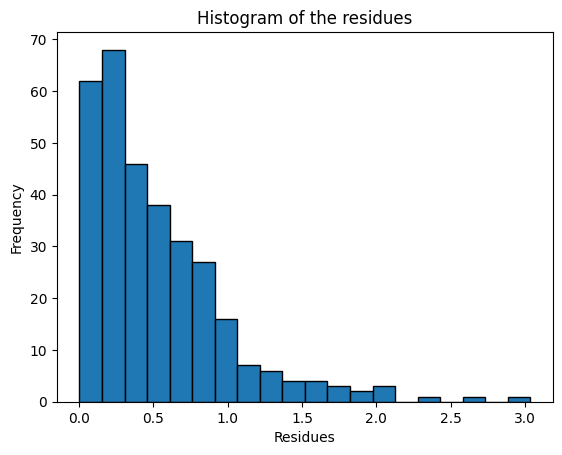

In [50]:
import matplotlib.pyplot as plt

# Plot the residues
plt.hist(residues,bins=20, edgecolor='black')
plt.title('Histogram of the residues')
plt.xlabel('Residues')
plt.ylabel('Frequency')
plt.savefig('ex1_histogram.png')
plt.show()

### Exercise 2 ###

Round the predicted output to the nearest integer and bound it between [0,10]. Calculate both the previous and the new Mean Absolute Error and compare them.

In [51]:
for i in range(1, 11):
    y_pred = np.zeros(len(target_test))
    # Learn the MLP regressor 
    mlp = MLPRegressor(hidden_layer_sizes=(10,10), activation='relu', early_stopping=True, validation_fraction=0.2, random_state=i)
    #Predict output
    y_pred = mlp.fit(variables_train,target_train).predict(variables_test)
    #Calculate MAE (not rounded and bounded)
    mae = np.mean(abs(target_test - y_pred))
    #Round and bound the predictions
    y_pred = np.round(y_pred)
    y_pred = np.clip(y_pred, a_min=1, a_max=10)
    #Calculate MAE (rounded and bounded)
    mae_rounded = np.mean(abs(target_test - y_pred))

mean_mae = np.mean(mae)
mean_mae_rounded = np.mean(mae_rounded)

# Print the results
print('MAE (not rounded and bounded): ', mean_mae)
print('MAE (rounded and bounded): ', mean_mae_rounded)

/home/rofarate/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rofarate/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rofarate/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rofarate/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rofarate/.local/lib/python3.8/site-pac

MAE (not rounded and bounded):  0.5396508087477347
MAE (rounded and bounded):  0.471875


### Exercise 3 ###

Calculate the average RMSE for the old MLP regressor

In [52]:
sum_rmse_old = 0
for i in range(1, 11):
    #Learn the old MLP regressor
    mlp = MLPRegressor(hidden_layer_sizes=(10,10), activation='relu', early_stopping=True, validation_fraction=0.2, random_state=i)
    #Predict old output
    y_pred_old = mlp.fit(variables_train,target_train).predict(variables_test)
    #Calculate old RMSE
    rmse = np.sqrt(np.mean((target_test - y_pred_old) ** 2))
    sum_rmse_old += rmse

average_rmse_old = np.mean(sum_rmse_old/10)


/home/rofarate/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rofarate/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rofarate/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rofarate/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rofarate/.local/lib/python3.8/site-pac

Learn 4 different MLP regressors with the same parameters as before except early stopping, instead stopping after 20, 50, 100 and 200 iterations. Calculate their root mean squared error. In each of these MLP regressors the predicted output is still considered to be the average of 10 regressors with seeded from 1 to 10.

In [53]:
# Calculate the RMSE for each number of iterations
new_rmse_array = []
iter_array = [20,50,100,200]
for iter in iter_array:
    y_pred_new = np.zeros(len(target_test))
    sum_rmse_new = 0
    for i in range(1, 11):
        # Learn the new MLP regressor 
        mlp = MLPRegressor(hidden_layer_sizes=(10,10), activation='relu', solver='adam', max_iter = iter, random_state=i)
        #Predict new output
        y_pred_new = mlp.fit(variables_train,target_train).predict(variables_test)
        #Calculate new RMSE
        rmse = np.sqrt(np.mean((target_test - y_pred_new) ** 2))
        sum_rmse_new += rmse
    #Append new RMSE
    new_rmse_array += [sum_rmse_new/10]

/home/rofarate/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rofarate/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rofarate/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rofarate/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rofarate/.local/lib/python3.8/site-package

Define the constant function with the RMSE value calculated when early stopping is in effect. Plot the RMSE against the maximum number of iteration of the regressor.

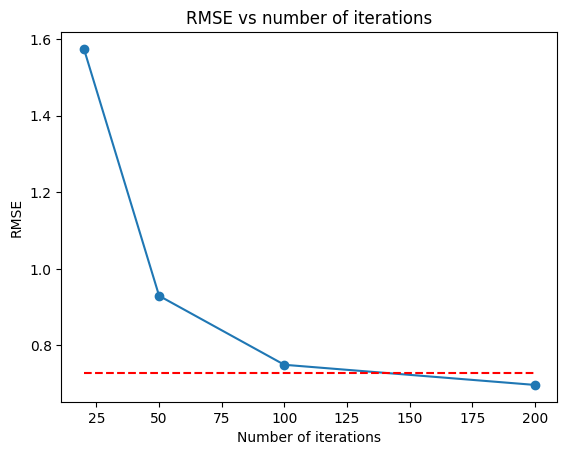

In [54]:
def const(x): return average_rmse_old

# Plot the RMSE
plt.plot(iter_array, new_rmse_array, '-o', label='RMSE')
plt.hlines(average_rmse_old, xmin=min(iter_array), xmax=max(iter_array), colors='r', linestyles='dashed')
plt.xlabel('Number of iterations') 
plt.ylabel('RMSE')
plt.title('RMSE vs number of iterations')
plt.savefig('ex3_rmse.png')
plt.show()
